# Testing - analyze whole chapter instead of average of sentences

In [1]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange


import os 
from pathlib import Path

In [2]:
from src import my_books_sentiment_analyzer as my_analyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
directory_path = my_analyzer.get_books_directory_path()

In [4]:
books = []
books = my_analyzer.get_list_of_books(directory_path, books)


['1984.txt', 'Aladdin-Ruth_Hobart.txt', 'at_the_mountains_of_madness.txt', 'Brave_New_World_Aldous_Huxley.txt', 'Peter_Pan-J_M_Barrie.txt', 'Sleeping_Beauty-Charles_Perrault.txt', 'The Call of Cthulhu - H. P. Lovecraft.txt', 'The_Old_Man_and_the_Sea-Ernest_Hemingway.txt']


In [5]:
books_elements_pattern = my_analyzer.define_pattern_to_get_chapters_information()

### Dictionary by sentence

In [6]:
my_books_dictionary_by_sentence = defaultdict(dict)
my_books_dictionary_by_sentence = my_analyzer.initialize_books_dictionary(directory_path, my_books_dictionary_by_sentence, books, books_elements_pattern)

### Dictionary by whole chapter

In [7]:
my_books_dictionary_by_whole_chapter = defaultdict(dict)
my_books_dictionary_by_whole_chapter = my_analyzer.initialize_books_dictionary(directory_path, my_books_dictionary_by_whole_chapter, books, books_elements_pattern)

In [8]:
analyzer = SentimentIntensityAnalyzer()

### Analysis by sentence

In [9]:
my_books_dictionary_by_sentence = my_analyzer.get_sentiment_analysis_by_average_sentences_value_in_chapter(my_books_dictionary_by_sentence)

1984


   Chapter 1 PART ONE - No title
   Chapter 2 PART ONE - No title
   Chapter 3 PART ONE - No title
   Chapter 4 PART ONE - No title
   Chapter 5 PART ONE - No title
   Chapter 6 PART ONE - No title
   Chapter 7 PART ONE - No title
   Chapter 8 PART ONE - No title
   Chapter 1 PART TWO - No title
   Chapter 2 PART TWO - No title
   Chapter 3 PART TWO - No title
   Chapter 4 PART TWO - No title
   Chapter 5 PART TWO - No title
   Chapter 6 PART TWO - No title
   Chapter 7 PART TWO - No title
   Chapter 8 PART TWO - No title
   Chapter 9 PART TWO - No title
   Chapter III War is Peace
   Chapter I when he heard Julia's footstep on the stair and started out of his chair
   Chapter 1 PART THREE - No title
   Chapter 2 PART THREE - No title
   Chapter 3 PART THREE - No title
   Chapter 4 PART THREE - No title
   Chapter 5 PART THREE - No title
   Chapter 6 PART THREE - No title

Aladdin-Ruth_Hobart


   CHAPTER UNIQUE Chapter unique

at_the_mountains_of_madness


   CHAPTER 1 No title
   CHAPTER 2 No title
   CHAPTER 3 No title
   CHAPTER 4 No title
   CHAPTER 5 No title
   CHAPTER 6 No title
   CHAPTER 7 No title
   CHAPTER 8 No title
   CHAPTER 9 No title
   CHAPTER 10 No title
   CHAPTER 11 No title
   CHAPTER 12 No title

Brave_New_World_Aldous_Huxley


   Chapter One No title
   Chapter Two No title
   Chapter Three No title
   Chapter Four No title
   Chapter Five No title
   Chapter Six No title
   Chapter Seven No title
   Chapter Eight No title
   Chapter Nine No title
   Chapter Ten No title
   Chapter Eleven No title
   Chapter Twelve No title
   Chapter Thirteen No title
   Chapter Fourteen No title
   Chapter Fifteen No title
   Chapter Sixteen No title
   Chapter Seventeen No title
   Chapter Eighteen No title

Peter_Pan-J_M_Barrie


   Chapter one The Nursery
   Chapter two The Shadow
   CHAPTER THREE The Neverland
   CHAPTER FOUR The Mermaid's Lagoon
   Chapter five The Underground Home
   CHAPTER SIX The Jolly Roger
   CHAPTER SEVEN Home at Last

Sleeping_Beauty-Charles_Perrault


   CHAPTER UNIQUE chapter unique

The Call of Cthulhu - H. P. Lovecraft


   CHAPTER I THE HORROR IN CLAY
   CHAPTER II THE TALE OF INSPECTOR LEGRASSE
   CHAPTER III THE MADNESS FROM THE SEA

The_Old_Man_and_the_Sea-Ernest_Hemingway


   CHAPTER ONE The Worst Kind of Mark
   CHAPTER TWO Far Out to Sea
   CHAPTER THREE The Battle Begins
   CHAPTER FOUR An Even Eight
   CHAPTER FIVE Shark Attack
   CHAPTER SIX The Final Battle




### Analysis whole chapter

In [10]:
my_books_dictionary_by_whole_chapter = my_analyzer.get_sentiment_analysis_from_entire_chapter(my_books_dictionary_by_whole_chapter)

1984



Aladdin-Ruth_Hobart



at_the_mountains_of_madness



Brave_New_World_Aldous_Huxley



Peter_Pan-J_M_Barrie



Sleeping_Beauty-Charles_Perrault



The Call of Cthulhu - H. P. Lovecraft



The_Old_Man_and_the_Sea-Ernest_Hemingway


### Compound Sentiments by Sentece

In [11]:
compound_sentiments_by_sentence = my_analyzer.get_compount_sentiments(my_books_dictionary_by_sentence)

### Compound Sentiments by whole Chapter

In [12]:
compound_sentiments_by_whole_chapter = my_analyzer.get_compount_sentiments(my_books_dictionary_by_whole_chapter)

### Analysis whole chapter

In [13]:
my_books_dictionary_by_sentence['Peter_Pan-J_M_Barrie']['Chapter1']

('Chapter one The Nursery',
 "\n\nWendy, John and Michael Darling live in a lovely house in London. They have got a big, sunny nursery. There are colourful pictures and a big clock on the wall. There are toys here and there. The Darlings are a happy family. Mr Darling and Mrs Darling love their children very much. Wendy is the first child, John is the second and Michael is the third.\n\nThe children's nanny is called Nana and she is a big Newfoundland dog! Her kennel is in the nursery and she is a wonderful nanny. She loves the children and the children love her.\n\nOne evening Mr and Mrs Darling want to go to a dinner party. They have their best clothes on.\n\n'Nana, it's time to put the children to bed,' says Mrs Darling.\n\nNana goes to the bathroom. She turns on the hot water for Michael's bath. She puts her paw in the water to check the temperature. It's perfect!\n\n'I don't want to have a bath!' says little Michael.\n\nBut Nana is a firm nanny and Michael has his bath.\n\nThen Na

In [14]:
my_books_dictionary_by_whole_chapter['Peter_Pan-J_M_Barrie']['Chapter1']

('Chapter one The Nursery',
 "\n\nWendy, John and Michael Darling live in a lovely house in London. They have got a big, sunny nursery. There are colourful pictures and a big clock on the wall. There are toys here and there. The Darlings are a happy family. Mr Darling and Mrs Darling love their children very much. Wendy is the first child, John is the second and Michael is the third.\n\nThe children's nanny is called Nana and she is a big Newfoundland dog! Her kennel is in the nursery and she is a wonderful nanny. She loves the children and the children love her.\n\nOne evening Mr and Mrs Darling want to go to a dinner party. They have their best clothes on.\n\n'Nana, it's time to put the children to bed,' says Mrs Darling.\n\nNana goes to the bathroom. She turns on the hot water for Michael's bath. She puts her paw in the water to check the temperature. It's perfect!\n\n'I don't want to have a bath!' says little Michael.\n\nBut Nana is a firm nanny and Michael has his bath.\n\nThen Na

### Print compound sentiments by sentences

In [15]:
my_analyzer.print_books_chapters_compound_sentiment(my_books_dictionary_by_sentence, compound_sentiments_by_sentence)

1984
  Chapter 1 - Chapter 1 PART ONE - No title
       -0.07402490272373537
  Chapter 2 - Chapter 2 PART ONE - No title
       -0.029473333333333324
  Chapter 3 - Chapter 3 PART ONE - No title
       -0.0023646258503401446
  Chapter 4 - Chapter 4 PART ONE - No title
       0.0061828828828828925
  Chapter 5 - Chapter 5 PART ONE - No title
       0.02730819112627986
  Chapter 6 - Chapter 6 PART ONE - No title
       0.045588775510204085
  Chapter 7 - Chapter 7 PART ONE - No title
       -0.014508839779005538
  Chapter 8 - Chapter 8 PART ONE - No title
       0.0074358178053830284
  Chapter 9 - Chapter 1 PART TWO - No title
       -0.0306193832599119
  Chapter 10 - Chapter 2 PART TWO - No title
       0.06632040816326532
  Chapter 11 - Chapter 3 PART TWO - No title
       0.00703080808080808
  Chapter 12 - Chapter 4 PART TWO - No title
       0.06314533898305084
  Chapter 13 - Chapter 5 PART TWO - No title
       -0.0717066666666667
  Chapter 14 - Chapter 6 PART TWO - No title
       0.0

### Print compound sentiments by whole chapters

In [16]:
my_analyzer.print_books_chapters_compound_sentiment(my_books_dictionary_by_whole_chapter, compound_sentiments_by_whole_chapter)

1984
  Chapter 1 - Chapter 1 PART ONE - No title
       -0.9996
  Chapter 2 - Chapter 2 PART ONE - No title
       -0.9948
  Chapter 3 - Chapter 3 PART ONE - No title
       -0.9954
  Chapter 4 - Chapter 4 PART ONE - No title
       0.7384
  Chapter 5 - Chapter 5 PART ONE - No title
       0.9941
  Chapter 6 - Chapter 6 PART ONE - No title
       0.9941
  Chapter 7 - Chapter 7 PART ONE - No title
       -0.9844
  Chapter 8 - Chapter 8 PART ONE - No title
       0.736
  Chapter 9 - Chapter 1 PART TWO - No title
       -0.998
  Chapter 10 - Chapter 2 PART TWO - No title
       0.9993
  Chapter 11 - Chapter 3 PART TWO - No title
       0.9029
  Chapter 12 - Chapter 4 PART TWO - No title
       0.9993
  Chapter 13 - Chapter 5 PART TWO - No title
       -0.999
  Chapter 14 - Chapter 6 PART TWO - No title
       0.9291
  Chapter 15 - Chapter 7 PART TWO - No title
       -0.9867
  Chapter 16 - Chapter 8 PART TWO - No title
       -0.5443
  Chapter 17 - Chapter 9 PART TWO - No title
       -0.

In [17]:
book_indices = my_analyzer.get_books_indices(my_books_dictionary_by_sentence)
book_indices

{'1984': (0, 25),
 'Aladdin-Ruth_Hobart': (25, 26),
 'at_the_mountains_of_madness': (26, 38),
 'Brave_New_World_Aldous_Huxley': (38, 56),
 'Peter_Pan-J_M_Barrie': (56, 63),
 'Sleeping_Beauty-Charles_Perrault': (63, 64),
 'The Call of Cthulhu - H. P. Lovecraft': (64, 67),
 'The_Old_Man_and_the_Sea-Ernest_Hemingway': (67, 73)}

### Sentiment of books chapters analyzed by sentences average

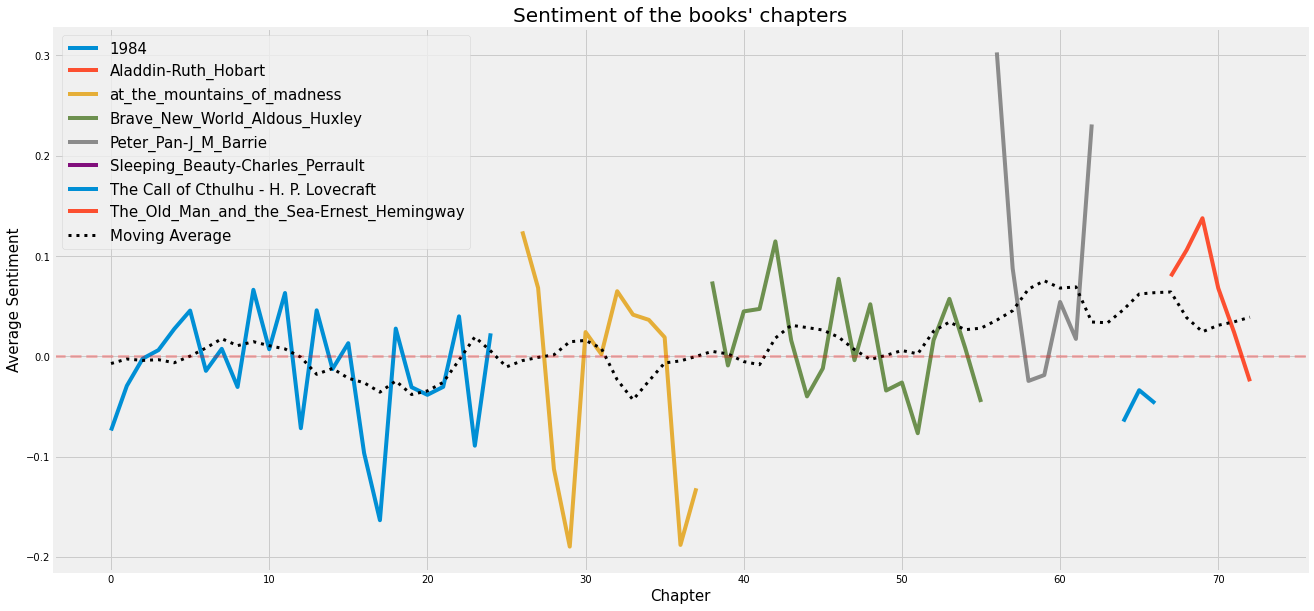

In [18]:
my_analyzer.plot_books_chapters_sentiment(my_books_dictionary_by_sentence, compound_sentiments_by_sentence, book_indices)

### Sentiment of books chapters analyzed by whole chapters

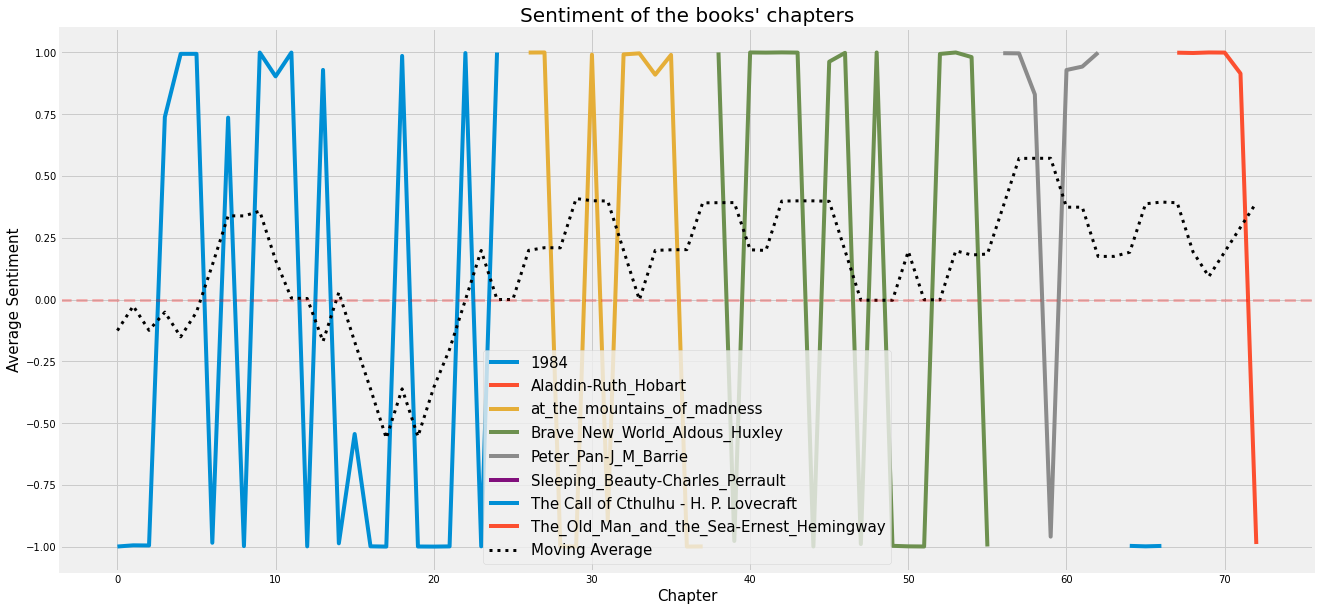

In [19]:
my_analyzer.plot_books_chapters_sentiment(my_books_dictionary_by_whole_chapter, compound_sentiments_by_whole_chapter, book_indices)

### Sentiment scores by sentences

In [20]:
sentiment_scores_by_sentences = my_analyzer.get_chapters_sentiment_scores_values(my_books_dictionary_by_sentence)

In [21]:
my_analyzer.print_average_books_sentiment(sentiment_scores_by_sentences, book_indices)

Average Book Sentiment:

1984                                         -1.25%
Aladdin-Ruth_Hobart                          9.87%
at_the_mountains_of_madness                  -2.01%
Brave_New_World_Aldous_Huxley                1.45%
Peter_Pan-J_M_Barrie                         9.29%
Sleeping_Beauty-Charles_Perrault             14.06%
The Call of Cthulhu - H. P. Lovecraft        -4.86%
The_Old_Man_and_the_Sea-Ernest_Hemingway     6.50%


### Sentiment scores by whole chapter

In [22]:
sentiment_scores_by_chapter = my_analyzer.get_chapters_sentiment_scores_values(my_books_dictionary_by_whole_chapter)

In [23]:
my_analyzer.print_average_books_sentiment(sentiment_scores_by_chapter, book_indices)

Average Book Sentiment:

1984                                         -12.89%
Aladdin-Ruth_Hobart                          99.97%
at_the_mountains_of_madness                  16.56%
Brave_New_World_Aldous_Huxley                22.06%
Peter_Pan-J_M_Barrie                         67.62%
Sleeping_Beauty-Charles_Perrault             99.90%
The Call of Cthulhu - H. P. Lovecraft        -99.77%
The_Old_Man_and_the_Sea-Ernest_Hemingway     65.34%


### Sentiment analyzed by sentences average in the entire list of books

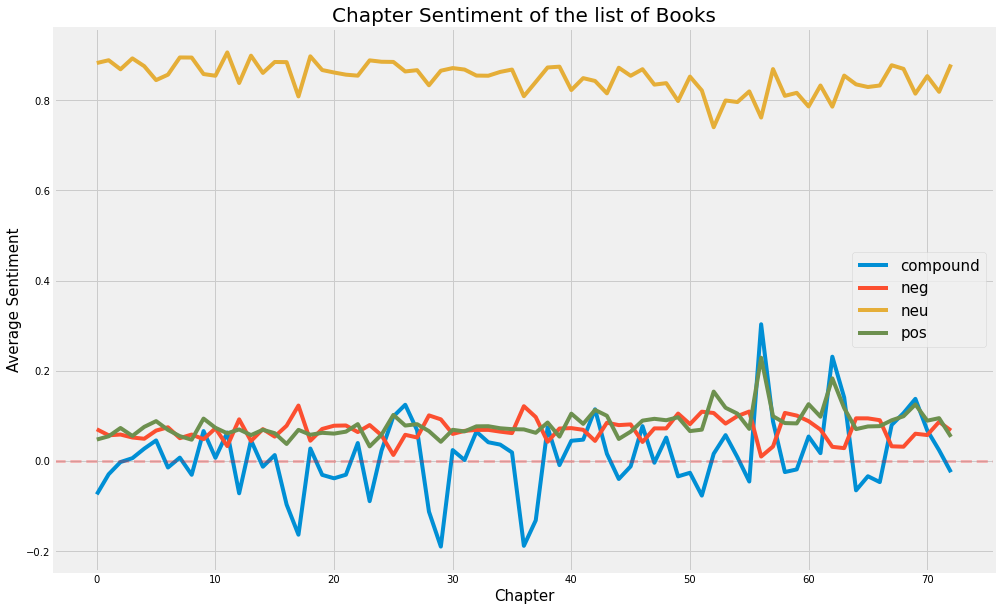

In [24]:
my_analyzer.plot_sentiment_of_entire_serie_of_books(my_books_dictionary_by_sentence, sentiment_scores_by_sentences)

### Sentiment analyzed by WHOLE CHAPTER in the entire list of books

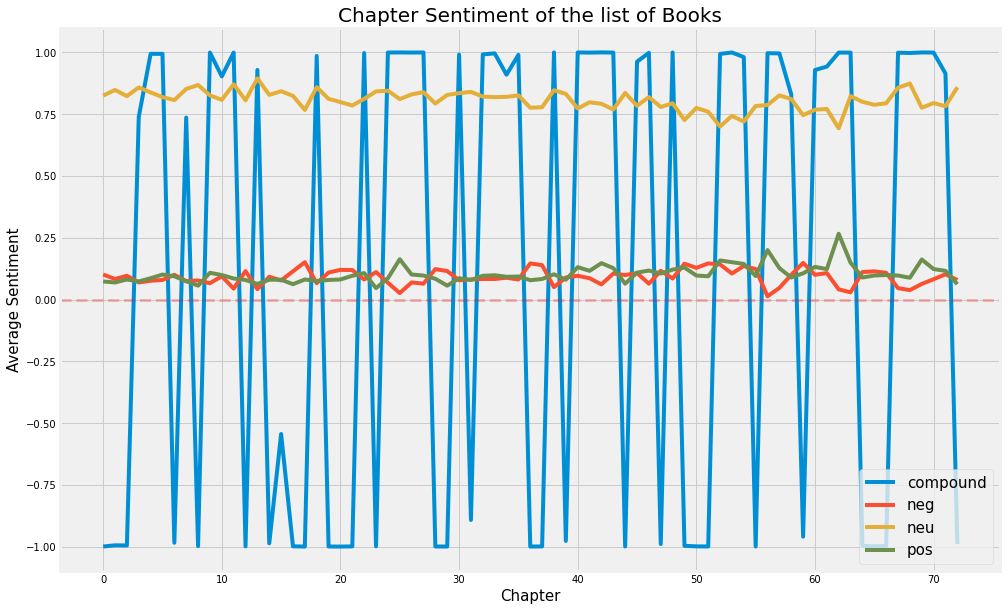

In [25]:
my_analyzer.plot_sentiment_of_entire_serie_of_books(my_books_dictionary_by_whole_chapter, sentiment_scores_by_chapter)

# Comparisions between analysis by sentence in chapter vs whole chapter

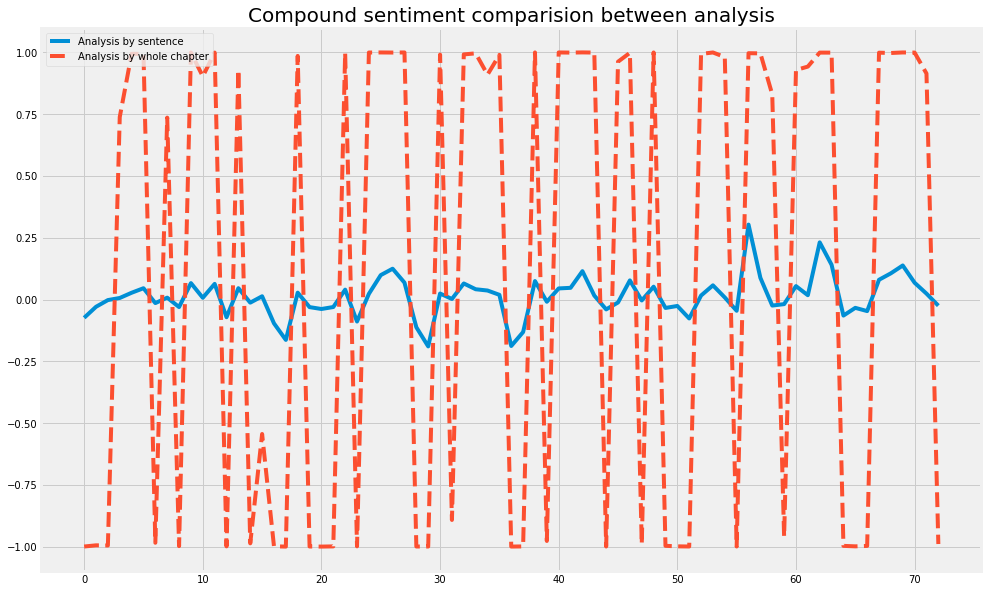

In [26]:
my_analyzer.plot_compound_sentiment_comparison_between_analysis(my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

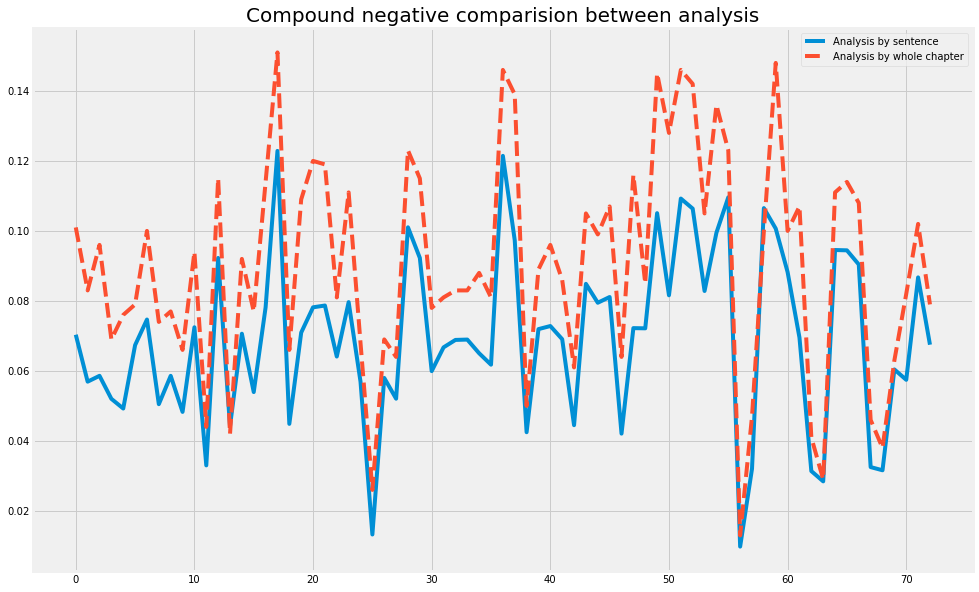

In [27]:
my_analyzer.plot_negative_sentiment_comparison_between_analysis(my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

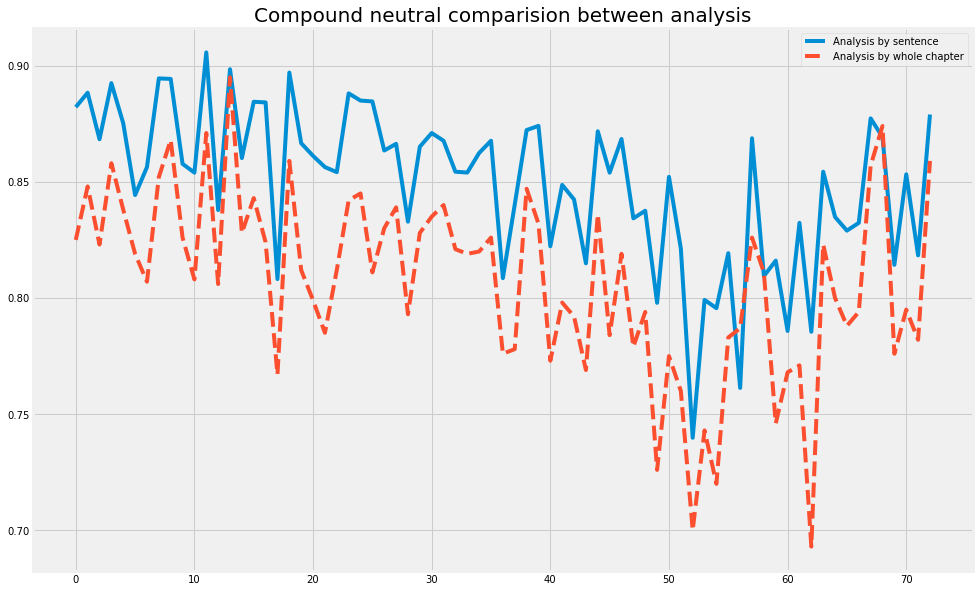

In [28]:
my_analyzer.plot_neutral_sentiment_comparison_between_analysis(my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

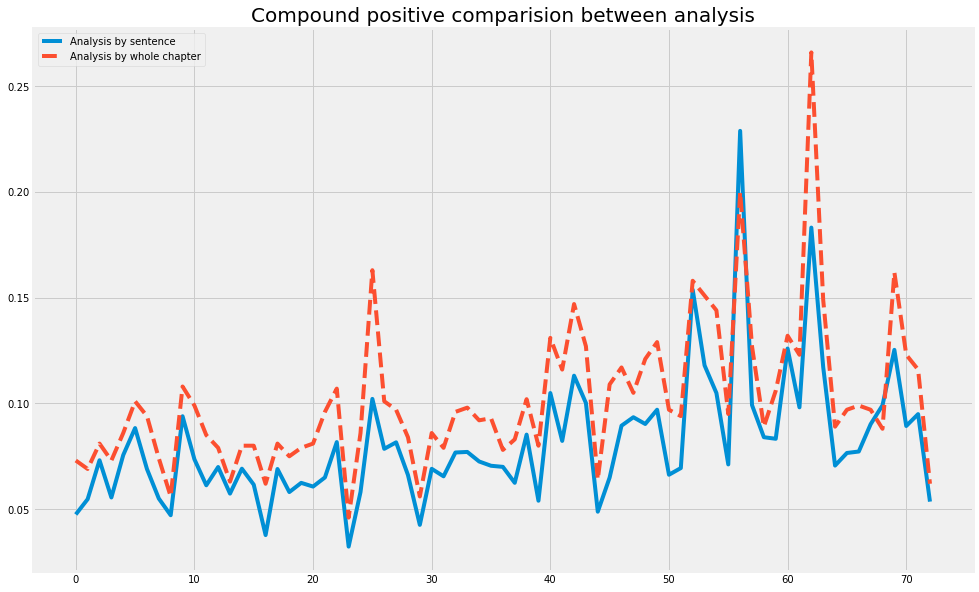

In [29]:
my_analyzer.plot_positive_sentiment_comparison_between_analysis(my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

### Chapter sentiment in entire series, analysis by sentence average vs whole chapter

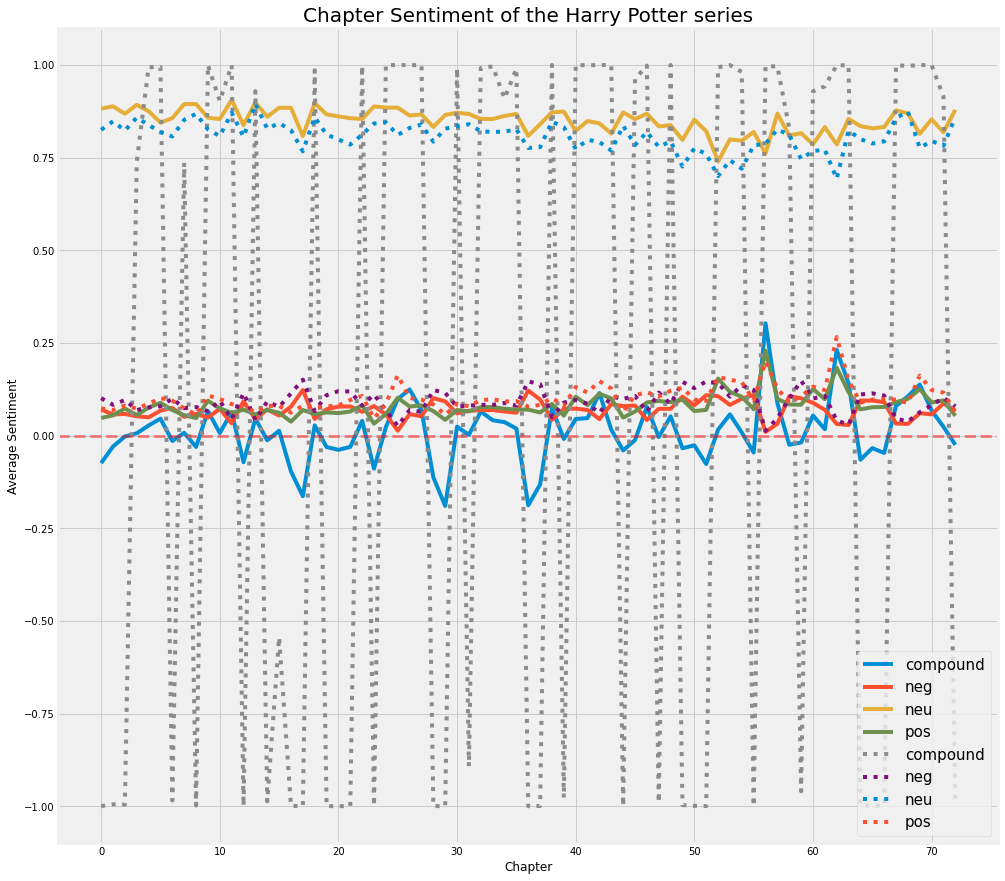

In [30]:
my_analyzer.plot_all_sentiments_comparision_between_analysis(sentiment_scores_by_sentences, sentiment_scores_by_chapter, my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

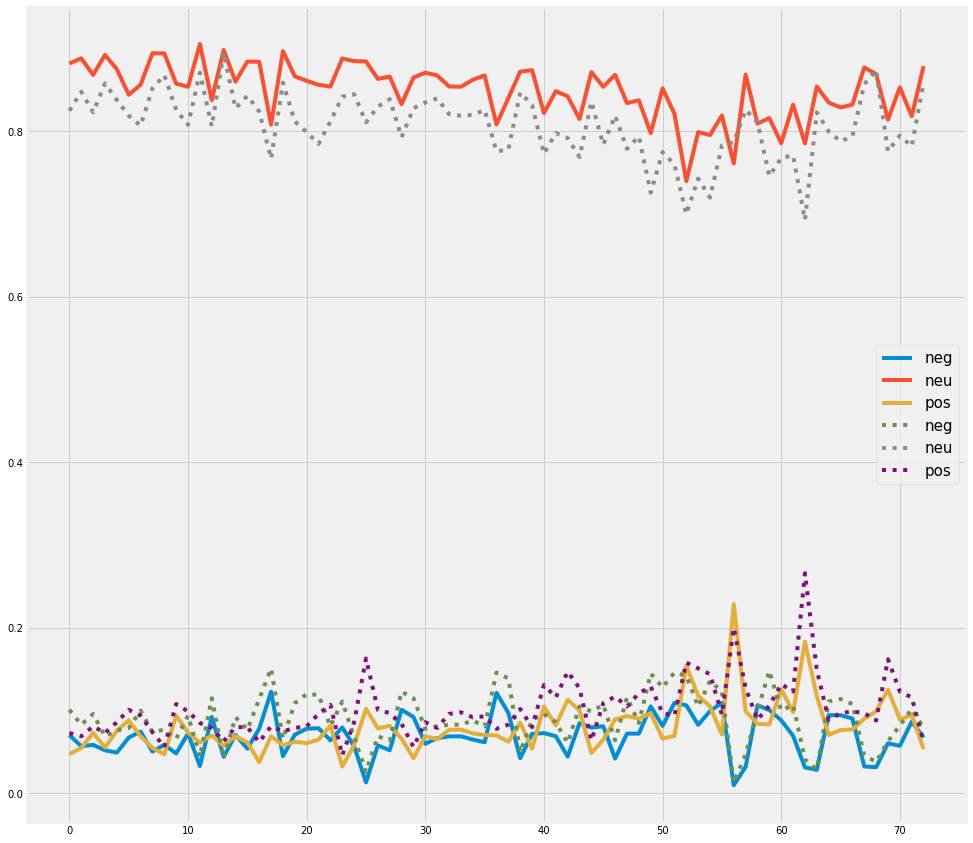

In [31]:
my_analyzer.plot_all_sentiments_comparision_between_analysis_except_compound(sentiment_scores_by_sentences, sentiment_scores_by_chapter, my_books_dictionary_by_sentence, my_books_dictionary_by_whole_chapter)

# Test TextBlob NaiveBayes and Pattern analyzers